<a href="https://colab.research.google.com/github/falcoonn/Hola_mundo/blob/main/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install funpymodeling

In [149]:
#importamos papalerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#leemos el archivo
data1 = pd.read_excel("microretailer_mit_lift_lab_actualizado.xlsx")
data1

In [ ]:
#vemos su informacion
data1.info(10000)

In [ ]:
#Verificamos los valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos.head(9999999999999)

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

In [ ]:
#reemplazamos los valores nulos con la palabra nulo
data=data1.copy()

In [ ]:
#verificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [111]:
#aplicamos filtro
filtro1=data.iloc[ : , [0,1,2,3,4,7,8,9,10,11,12,15,17,18,19,20,25,26,27,28,30,32,34,35,36,37,38,39,40,41,43,44,46,47,48,50,52,53,54,55,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,105]] #obj
filtro2=data.iloc[ : , [5,6,13,16,14,21,22,29,31,33,42,45,49,51,56,57,58,59,60,78,90,104]]     #float

In [112]:
#Limpiamos los valores nulos de las columnas tipo objeto y la sustituimos con la palabra nulo
filtro1=filtro1.fillna("nulo")

In [ ]:
#verificamos la información
filtro1.info()

In [ ]:
#hacemos una grafica de valores atipicos
fig = plt.figure(figsize =(15, 8))
filtro2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [115]:
#hacemos uso del metodo de cuartiles 
y=filtro2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            19.114494
_longitude                                          -98.103732
97_number_of_customers_in_store                       5.000000
104_how_many_shelves_does_the_micro_retailer_have    13.500000
268_number_fridges                                    5.000000
2_current_permanent_employees                         3.500000
4_number_permanent_employees_last_year                5.000000
103_number_own_fridges                                5.375000
145_number_direct_competitors                        10.625000
24_burnout                                           12.000000
272_card_days_receive_money                           1.000000
275_platform_days_receive_money                      11.250000
276_expected_days_informal_credit                    34.500000
36_credit_default_rate                                5.000000
315_frequency_topups                                 17.625000
316_frequency_utility_bills  

In [ ]:
#mostramos los limites 
outliers_iqr= filtro2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe 
Valores_finales= outliers_iqr.copy()
Valores_finales=Valores_finales.fillna(round(outliers_iqr.mean(),1))
Valores_finales

In [ ]:
#vemos los valores nulos
valores_nulos=Valores_finales.isnull().sum()
valores_nulos

Regresión lineal multiple






In [119]:
#Visualizamos los primeros 5 datos 
Valores_finales.head(10)

,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,2.0,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,NaN
1,19.043975,-98.201696,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
2,19.043300,-98.196447,2.0,0.0,0.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,1.6,10.0,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,NaN
4,19.043674,-98.201134,3.0,3.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
5,19.044002,-98.200912,2.0,6.0,1.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
6,19.043920,-98.201472,0.0,2.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
7,19.043972,-98.201393,3.0,2.0,2.0,1.3,1.5,1.6,3.4,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
8,19.043967,-98.201791,1.1,3.0,4.0,1.3,1.5,4.0,3.0,3.0,...,10.8,1.3,4.4,2.8,4.0,0.0,2.0,3.0,4.3,NaN
9,19.016819,-98.220304,1.0,6.0,0.0,0.0,1.0,1.6,1.0,3.9,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,NaN


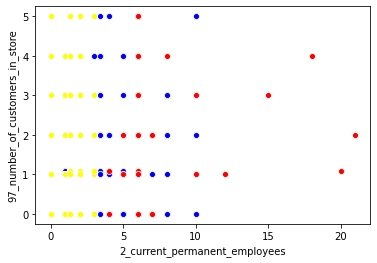

In [132]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Valores_finales)
sns.scatterplot(x='317_home_deliveries', y='97_number_of_customers_in_store', color="red", data=Valores_finales)
sns.scatterplot(x='2_current_permanent_employees', y='97_number_of_customers_in_store', color="yellow", data=Valores_finales)

In [135]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= Valores_finales[['145_number_direct_competitors', '317_home_deliveries','2_current_permanent_employees']]
Var_Dep= data1['97_number_of_customers_in_store']

In [136]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [137]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [138]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

In [140]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.04470484399935959

**MODELO PREDICTIVO**



In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=Valores_finales[['145_number_direct_competitors', '317_home_deliveries', '2_current_permanent_employees']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
#Valores_finales.insert(0, 'Predicciones', y_pred)
Valores_finales

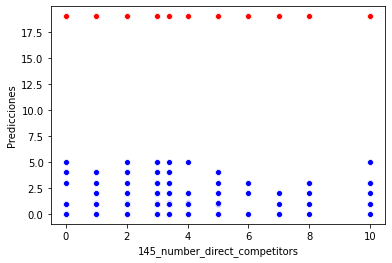

In [160]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue", data=Valores_finales)
sns.scatterplot(x='145_number_direct_competitors', y='Predicciones', color="red", data=Valores_finales)


In [161]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.04470484399935959

In [162]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21143520047371392

Regresión Lineal

In [163]:
#Mostramos los primeros 20 valores 
Valores_finales.head(20)

,Predicciones,_latitude,_longitude,97_number_of_customers_in_store,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.039386,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,...,10.8,1.3,4.4,2.8,6.0,10.0,2.0,2.0,10.0,NaN
1,19.039846,19.043975,-98.201696,2.0,0.0,0.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
2,19.039846,19.043300,-98.196447,2.0,0.0,0.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
3,19.044797,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,1.6,10.0,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,NaN
4,19.038870,19.043674,-98.201134,3.0,3.0,2.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
5,19.039962,19.044002,-98.200912,2.0,6.0,1.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
6,19.042494,19.043920,-98.201472,0.0,2.0,2.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
7,19.038870,19.043972,-98.201393,3.0,2.0,2.0,1.3,1.5,1.6,3.4,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,2.7,4.3,NaN
8,19.041397,19.043967,-98.201791,1.1,3.0,4.0,1.3,1.5,4.0,3.0,...,10.8,1.3,4.4,2.8,4.0,0.0,2.0,3.0,4.3,NaN
9,19.044797,19.016819,-98.220304,1.0,6.0,0.0,0.0,1.0,1.6,1.0,...,10.8,1.3,4.4,2.8,6.0,3.9,2.0,1.0,0.0,NaN


In [191]:
#Rellenamos nulos
df =Valores_finales.fillna(method="ffill")
df =Valores_finales.fillna(method="bfill")

In [208]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['145_number_direct_competitors', '317_home_deliveries', '2_current_permanent_employees']]
Var_Dep= df['97_number_of_customers_in_store']

In [209]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [203]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [204]:
#Se escalan todos los datos
escalar = StandardScaler()

In [205]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [206]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [207]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test) 
y_pred

In [177]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

ValueError: ignored

In [210]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

ValueError: ignored

In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.43119266055045874


In [211]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

ValueError: ignored

In [ ]:
#concatemos 
Lastmile_customer_limpios = pd.concat([filtro1, Valores_finales], axis=1)
Lastmile_customer_limpios

In [ ]:
#Convertir DataFrame a CSV
Lastmile_customer_limpios.to_csv("microretailer_mit_lift_lab_actualizado.csv.")

In [ ]:
#Descargar archivo filtrado en csv 
from google.colab import files
files.download("microretailer_mit_lift_lab_actualizado.csv.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>